# More simulations

In the previous tutorial we only simulated simple 1D diffusion processes. Here, we show more examples of simulations with different dynamics, illustrating in particular the generic class `stochrare.dynamics.diffusion.DiffusionProcess`.

## 2D Diffusions: gradient dynamics

Let us start with basic diffusion processes in 2D: the Wiener process and the Ornstein-Uhlenbeck process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stochrare.dynamics.diffusion import Wiener, OrnsteinUhlenbeck

In [2]:
np.random.seed(seed=100)

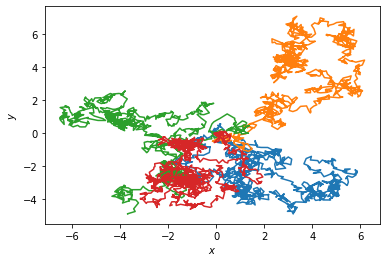

In [3]:
ax = plt.axes(xlabel=r'$x$', ylabel=r'$y$')
for _ in range(4):
    t, x = Wiener(2).trajectory(np.array([0., 0.]), 0., dt=0.01)
    ax.plot(x[:, 0], x[:, 1])

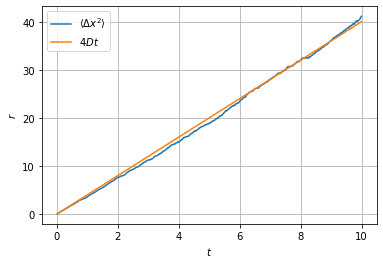

In [4]:
time, dist2 = zip(*[(t,r) for t,r in Wiener(2).sample_mean(np.array([0.,0.]), 0., 1000, 1000, dt=0.01, 
                                                           observable=lambda x, t: x[0]**2+x[1]**2)])
ax = plt.axes(xlabel=r'$t$', ylabel=r'$r$')
ax.grid()
ax.plot(time, dist2, label=r'$\langle \Delta x^2 \rangle$')
ax.plot(time, 4*np.array(time), label=r'$4Dt$')
ax.legend();

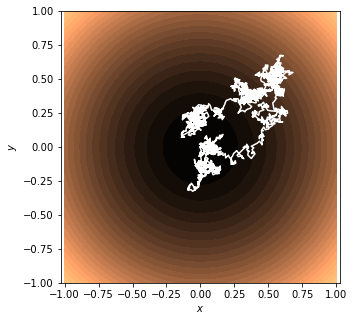

In [5]:
model = OrnsteinUhlenbeck(0,1, 0.1, 2)
xvec = np.linspace(-1., 1.)
yvec = np.linspace(-1., 1.)
potential = np.array([model.potential(np.array([x, y])) for x in xvec for y in yvec]).reshape(50, 50)
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(xlabel=r'$x$', ylabel=r'$y$')
ax.axis('equal')
ax.contourf(xvec, yvec, potential, 30, cmap='copper')
t, x = model.trajectory(np.array([0., 0.]), 0., T=2, dt=0.001)
ax.plot(x[:, 0], x[:, 1], color='white');

## Langevin equation

Now we simulate the Langevin dynamics:
$$\dot{x}=p/m, \quad \dot{p}=-V'(x)-\gamma p +\eta(t),$$
with a harmonic potential $V(x)=x^2/2$ and $\mathbb{E}[\eta(t)\eta(t')]=D\delta(t-t')$.

In [6]:
from stochrare.dynamics.diffusion import DiffusionProcess
gamma = 0
def langevin(gamma, D):
    return DiffusionProcess(lambda X, t: np.array([X[1], -X[0]-gamma*X[1]]),
                            lambda X, t: np.array([[0., 0.], [0., D]]))

Without friction and noise ($\gamma=D=0$), the system is Hamiltonian and $H=x^2+p^2$ is conserved. Adding some friction $\gamma >0$, the system relaxes towards equilibrium in a spiraling motion, because of inertia.
With noise, we inject energy randomly in the system, and the stationary distribution spreads over a region of phase space centered on the origin.

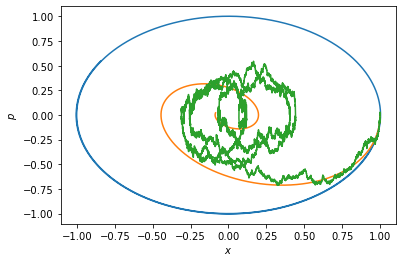

In [7]:
xvec = np.linspace(-1., 1.)
pvec = np.linspace(-1., 1.)
ax = plt.axes(xlabel=r'$x$', ylabel=r'$p$')
t, x = langevin(0, 0).trajectory(np.array([1., 0.]), 0., T=10, dt=0.001)
ax.plot(x[:,0], x[:,1]);
t, x = langevin(0.5, 0).trajectory(np.array([1., 0.]), 0., T=10, dt=0.001)
ax.plot(x[:,0], x[:,1]);
t, x = langevin(0.5, 0.2).trajectory(np.array([1., 0.]), 0., T=20, dt=0.001)
ax.plot(x[:,0], x[:,1]);